# Capstone Project - The Battle of Neighborhoods
Created with IBM Watson Studio

Suitable New Store Locations in Paris for a Fashion Retailer
This notebook contains multiple parts:

A description of the problem and a discussion of the background - Week 1

A description of the data and how it will be used to solve the problem - Week 1

Methodology and Exploratory Data Analysis - Week 2

Inferences and Discussion - Week 2

The seperate report goes into more decription of the methodology. This notebook gives only brief outlines of the methodology of each step, but includes all the code, dataframes and visualisations.

# 1 Introduction and Discussion of the Business Objective and Problem
Locations for New Fashion Stores in High Traffic Areas in Paris France
The Task At Hand

A digitally native vertical fashion retailer, with a substantial e-commerce footprint, has begun the rollout of brick and mortar stores as part of their omnichannel retail strategy. After rolling out stores in a few select cities by guessing where the best locations were to open, as part of their store expansion for Paris they've decided to be more informed and selective, and take the time to do some research.

I've been given the exciting task of assisting them to make data-driven decisions on the new locations that are most suitable for their new stores in Paris. This will be a major part of their decision-making process, the other being on the ground qualitative analysis of districts once this data and report are reviewed and studied.

The fashion brand is not what is considered high-end, they are positioned in upper end of the fast fashion market. As such, they do not seek stores in the premium upmarket strips like Avenue Montaigne, but rather, in high traffic areas where consumers go for shopping, restaurants and entertainment. Foursquare data will be very helpful in making data-driven decisions about the best of those areas.

Criteria

Qualitative data from another retailer that they know, suggests that the best locations to open new fashion retail stores may not only be where other clothing is located. This data strongly suggests that the best places are in fact areas that are near French Restaurants, Cafés and Wine Bars. Parisians are very social people that frequent these place often, so opening new stores in these locations is becoming popular.

The analysis and recommendations for new store locations will focus on general districts with these establishments, not on specific store addresses. Narrowing down the best district options derived from analysis allows for either further research to be conducted, advising agents of the chosen district, or on the ground searching for specific sites by the company's personnel.

Why Data?

Without leveraging data to make decisions about new store locations, the company could spend countless hours walking around districts, consulting many real estate agents with their own district biases, and end up opening in yet another location that is not ideal.

Data will provide better answers and better solutions to their task at hand.

Outcomes

The goal is to identify the best districts - Arrondissements - to open new stores as part of the company's plan. The results will be translated to management in a simple form that will convey the data-driven analysis for the best locations to open stores.

2 The Data Science Workflow
Data Requirements

The main districts in Paris are divided into 20 Arrondissements Municipaux (administrative districts), shortened to arrondissements.

The data regarding the districts in Paris needs to be researched and a suitable useable source identified. If it is found but is not in a useable form, data wrangling and cleaning will have to be performed.

The cleansed data will then be used alongside Foursquare data, which is readily available. Foursquare location data will be leveraged to explore or compare districts around Paris, identifying the high traffic areas where consumers go for shopping, dining and entertainment - the areas where the fashion brand are most interested in opening new stores.

The Data Science Workflow for Part 1 & 2 includes the following:

Outline the initial data that is required:
District data for Paris including names, location data if available, and any other details required.
Obtain the Data:
Research and find suitable sources for the district data for Paris.
Access and explore the data to determine if it can be manipulated for our purposes.
Initial Data Wrangling and Cleaning:
Clean the data and convert to a useable form as a dataframe.
The Data Science Workflow for parts 3 & 4 includes:

Data Analysis and Location Data:

Foursquare location data will be leveraged to explore or compare districts around Paris.

Data manipulation and analysis to derive subsets of the initial data.

Identifying the high traffic areas using data visualisation and tatistical nalysis.

Visualization:

Analysis and plotting visualizations.

Data visualization using various mapping libraries.

Discussion and Conclusions:

Recomendations and results based on the data analysis.

Discussion of any limitations and how the results can be used, and any conclusions that can be drawn.

Import the Required Libraries

In [4]:
# Import libraries
import numpy as np # library to handle data in a vectorized manner
import json # library to handle JSON files
import pandas as pd

In [5]:
#!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe


In [6]:
# Matplotlib and associated plotting modules
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors

from bs4 import BeautifulSoup

In [7]:
# Import k-means from clustering stage
from sklearn.cluster import KMeans


Data Research and Preparation
Import the Paris District Data
Arrondissements Municipaux for Paris CSV (administrative districts)
Paris is divided into 20 Arrondissements Municipaux (or administrative districts), shortened to just arrondissements. They and normally referenced by the arrondissement number rather than a name.

Data for the arrondissements is necessary to select the most suitable of these areas for new stores.

Initially looking to get this data by scraping the relevent Wikipedia page (https://en.wikipedia.org/wiki/Arrondissements_of_Paris), fortunately, after much research, this data is available on the web and can be manipulated and cleansed to provide a meaningful dataset to use.

Data from Open|DATA France: https://opendata.paris.fr/explore/dataset/arrondissements/table/?dataChart

Also available from Opendatasoft: https://data.opendatasoft.com/explore/dataset/arrondissements%40parisdata/export/

In [9]:
# Download the dataset and read it into a pandas dataframe.
paris = pd.read_csv('https://raw.githubusercontent.com/engr-muzammil/CapstoneProject/master/Arrondissements_.csv')
paris

,CAR,NAME,NSQAR,CAR.1,CARINSEE,LAR,NSQCO,SURFACE,PERIMETRE,Geometry_X,Geometry_Y
0,3,Temple,750000003,3,3,3eme Ardt,750001537,1170882828,4519264,48.862872,2.360001
1,19,Buttes-Chaumont,750000019,19,19,19eme Ardt,750001537,6792651129,11253182,48.887076,2.384821
2,14,Observatoire,750000014,14,14,14eme Ardt,750001537,5614877309,10317483,48.829245,2.326542
3,10,Entrepot,750000010,10,10,10eme Ardt,750001537,2891739442,6739375,48.876130,2.360728
4,12,Reuilly,750000012,12,12,12eme Ardt,750001537,16314782637,24089666,48.834974,2.421325
5,16,Passy,750000016,16,16,16eme Ardt,750001537,16372542129,17416110,48.860392,2.261971
6,11,Popincourt,750000011,11,11,11eme Ardt,750001537,3665441552,8282012,48.859059,2.380058
7,2,Bourse,750000002,2,2,2eme Ardt,750001537,991153745,4554104,48.868279,2.342803
8,4,Hotel-de-Ville,750000004,4,4,4eme Ardt,750001537,1600585632,5420908,48.854341,2.357630
9,17,Batignolles-Monceau,750000017,17,17,17eme Ardt,750001537,5668834504,10775580,48.887327,2.306777


# Exploring, Wrangling and Cleaning the Data
Rename the columns 'Geometry_X' and 'Geometry_Y', "CAR' to 'Arrondissement' etc...

In [10]:
# Rename the necessary columns 'Geometry_X and Geometry_Y' etc...

# District : name of the central District for the Arrondissement
# Arrondissement : the Arrondissement or district number which is used to identify it
# Arrondissement_Fr : the descriptive French label for each Arrondissement

paris.rename(columns={'NAME': 'Neighborhood ', 'CAR': 'Arrondissement_Num', 'Geometry_X': 'Latitude', 'Geometry_Y': 'Longitude',  'LAR': 'French_Name'}, inplace=True)
paris

,Arrondissement_Num,Neighborhood,NSQAR,CAR.1,CARINSEE,French_Name,NSQCO,SURFACE,PERIMETRE,Latitude,Longitude
0,3,Temple,750000003,3,3,3eme Ardt,750001537,1170882828,4519264,48.862872,2.360001
1,19,Buttes-Chaumont,750000019,19,19,19eme Ardt,750001537,6792651129,11253182,48.887076,2.384821
2,14,Observatoire,750000014,14,14,14eme Ardt,750001537,5614877309,10317483,48.829245,2.326542
3,10,Entrepot,750000010,10,10,10eme Ardt,750001537,2891739442,6739375,48.876130,2.360728
4,12,Reuilly,750000012,12,12,12eme Ardt,750001537,16314782637,24089666,48.834974,2.421325
5,16,Passy,750000016,16,16,16eme Ardt,750001537,16372542129,17416110,48.860392,2.261971
6,11,Popincourt,750000011,11,11,11eme Ardt,750001537,3665441552,8282012,48.859059,2.380058
7,2,Bourse,750000002,2,2,2eme Ardt,750001537,991153745,4554104,48.868279,2.342803
8,4,Hotel-de-Ville,750000004,4,4,4eme Ardt,750001537,1600585632,5420908,48.854341,2.357630
9,17,Batignolles-Monceau,750000017,17,17,17eme Ardt,750001537,5668834504,10775580,48.887327,2.306777


# Clean up the dataset to remove unnecessary columns¶

In [11]:
# Clean up the dataset to remove unnecessary columns.
# Some of the columns are for mapping software - not required here.

paris.drop(['NSQAR','CAR.1','CARINSEE','NSQCO','SURFACE', 'PERIMETRE' ], axis=1, inplace=True)
paris

,Arrondissement_Num,Neighborhood,French_Name,Latitude,Longitude
0,3,Temple,3eme Ardt,48.862872,2.360001
1,19,Buttes-Chaumont,19eme Ardt,48.887076,2.384821
2,14,Observatoire,14eme Ardt,48.829245,2.326542
3,10,Entrepot,10eme Ardt,48.876130,2.360728
4,12,Reuilly,12eme Ardt,48.834974,2.421325
5,16,Passy,16eme Ardt,48.860392,2.261971
6,11,Popincourt,11eme Ardt,48.859059,2.380058
7,2,Bourse,2eme Ardt,48.868279,2.342803
8,4,Hotel-de-Ville,4eme Ardt,48.854341,2.357630
9,17,Batignolles-Monceau,17eme Ardt,48.887327,2.306777


Create a new dataframe called for the venues of Paris called paris-venues

In [13]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['French_Name', 
                  'Latitude', 
                  'Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

# Define the function that extracts the category of the venue

In [16]:
# define a function that extracts the category of the venue

def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

# Structure the json file into a pandas dataframe

In [19]:
paris_venues.groupby('French_Name').count()

NameError: name 'paris_venues' is not defined

NameError: name 'paris_onehot' is not defined

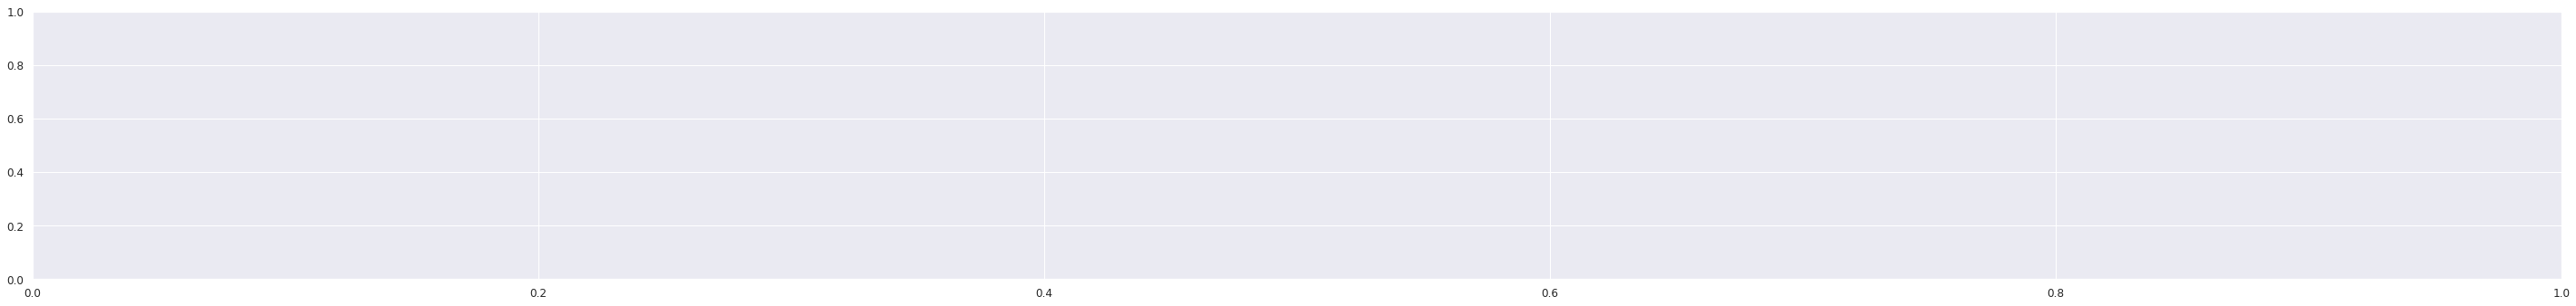

In [20]:
# Clothing_Store has been added to explore this category and make a comparison

import seaborn as sns

fig = plt.figure(figsize=(50,25))
sns.set(font_scale=1.1)

ax = plt.subplot(4,1,1)
sns.violinplot(x="Neighborhood", y="French Restaurant", data=paris_onehot, cut=0);
plt.xlabel("")

ax = plt.subplot(4,1,2)
sns.violinplot(x="Neighborhood", y="Café", data=paris_onehot, cut=0);
plt.xlabel("")

plt.subplot(4,1,3)
sns.violinplot(x="Neighborhood", y="Wine Bar", data=paris_onehot, cut=0);

plt.subplot(4,1,4)
sns.violinplot(x="Neighborhood", y="Clothing Store", data=paris_onehot, cut=0);

ax.text(-1.0, 3.1, 'Frequency distribution for the top 3 venue categories for each neighborhood (includes clothing)', fontsize=60)
plt.savefig ("Distribution_Frequency_Venues_3_categories_clothing.png", dpi=240)
plt.show()

In [21]:

# create map of Paris using the above latitude and longitude values
map_paris = folium.Map(location=[latitude, longitude], zoom_start=12)


# add markers to map
for lat, lng, label in zip(paris['Latitude'], paris['Longitude'], paris['French_Name']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=25,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.3,
        parse_html=False).add_to(map_paris)  
    
map_paris

NameError: name 'folium' is not defined

# 4 Inferences and Discussion
Chosen Neighborhoods - Results
Inferential analysis using the data, as well as domain knowledge of retail and marketing, allow the list to be focussed to just 3 neighbourhoods from the previous 8.

The reasoning being that if the 3 criteria have been met - identifying neighbourhoods that are lively with Restaurants, Cafés and Wine Bars - adding Clothing Stores into the mix of stores in the area is a significant bonus. Having some of the same category of stores in the same area - especially in fashion retail - is very desirable as a retailer.

So we can increase the criteria to include Restaurants, Cafés, Wine Bars and Clothing Stores - which narrows down and focuses the suggested districts for new stores to be located, and at the same time provides better locations for the brand.

So the final 3 prospective neighborhoods for new store locations are where 4 criteria are met:

- 3eme Ardt : Arrondissement 3, Temple
- 4eme Ardt : Arrondissement 4, Hotel-de-Ville
- 6eme Ardt : Arrondissement 6, Luxembourg


Let's look at the 3 districts on a Paris map

In [22]:

# The csv of the 3 chosen prospective neighborhoods was uploaded to GitHub for access and reference
# Download and put into a new dataframe called chosen_districts

chosen_districts = pd.read_csv('https://raw.githubusercontent.com/engr-muzammil/CapstoneProject/master/Chosen.csv')
chosen_districts

,Arrondissement_Num,Neighborhood,French_Name,Latitude,Longitude
0,3,Temple,3eme Ardt,48.862872,2.360001
1,4,Hotel-de-Ville,4eme Ardt,48.854341,2.357630
2,6,Luxembourg,6eme Ardt,48.849130,2.332898


In [23]:
# Create a folium map of Paris with the 3 neighborhoods superimposed on the map
map_chosen_districts = folium.Map(location=[latitude, longitude], zoom_start=13)

# add markers to map
for lat, lng, label in zip(chosen_districts['Latitude'], chosen_districts['Longitude'], chosen_districts['French_Name']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=45,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.2,
        parse_html=False).add_to(map_chosen_districts)  
    
map_chosen_districts

NameError: name 'folium' is not defined

Observations
I guess it's not a surprise that these districts are all very centrally located in the circular arrangement of Paris's arrondissements. Locations fitting the criteria for popular venues would normally be in central locations in many cities of the world.

From this visualisation it is clear that on a practical level, with no data to base decisions on, the circle of the 20 districs is very large, and researching and then visiting them all would be a daunting and time consuming task. We have narrowed the search area down significantly from 20 potential districts to 3 that should suit the client's retail business.

# Inferences
We have made inferences from the data in making the location recommendations, but that is exactly the point. There is no right or wrong answer or conclusion for the task at hand. The job of data analysis here is to steer a course for the location selection of new stores (i) to meet the criteria of being in neighbourhoods that are lively with abundant leisure venues, and (ii) to narrow the search down to just a few of the main areas that are best suited to match the criteria.

# Conclusions
There are many ways this analysis could have been performed based on different methodolgy and perhaps different data sources. I chose the method I selected as it was a straight forward way to narrow down the options, not complicating what is actually simple in many ways – meeting the the critera for the surrounding venues, and in my case, domain knowledge I have on the subject. I originally intended to use the clustering algorythms to cluster the data, but as it progressed it became obvious that this only complicated the task at hand. The analysis and results are not an end point, but rather a starting point that will guide the next part of the process to find specific store locations. The next part will involve domain knowledge of the industry, and perhaps, of the city itself. But the data analysis and resulting recommendations have greatly narrowed down the best district options based on data and what we can infer from it.

Without leveraging data to make focussed decisions, the process could have been drawn out and resulted in new stores opening in sub-standard areas for this retailer. Data has helped to provide a better strategy and way forward, these data-driven decisions will lead to a better solution in the end.

Thanks for taking part in my Data Science journey!